# Praca domowa 6
## Pola Mościcka

## Zadanie 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("house_data.csv")
df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [26]:
df.price.loc[(df.waterfront==1)&(df.grade>=df.grade.median())].mean()

1784151.7006802722

Odp: Ok 1784151.7

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [27]:
df[df.floors==2].bathrooms.median()>df[df.floors==3].bathrooms.median()


False

Odp: Nie 

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [28]:
df[df.lat>((df.lat.max()+df.lat.min())/2)].groupby("waterfront").grade.describe()

,count,mean,std,min,25%,50%,75%,max
waterfront,,,,,,,,
0,16198.0,7.719965,1.217724,1.0,7.0,8.0,8.0,13.0
1,115.0,9.139130,1.695644,5.0,8.0,9.0,10.0,12.0


Odp:Dla nieruchomosci która ma widok na wode: kwantyl 0.25 wynosi 8, a kwantyl 0.75 wynosi 10. 
Dla nieruchomosci, która nie ma widoku na wode: kwantyl 0.25 wynosi 7, a kwantyl 0.75 wynosi 8.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [29]:
k_p=df.zipcode.value_counts().head(1)
k_p
Q3=np.percentile(df.loc[df.zipcode==98103,"price"],75)
Q1=np.percentile(df.loc[df.zipcode==98103,"price"],25)
IQR=Q3-Q1

print(k_p)
IQR

98103    602
Name: zipcode, dtype: int64


262875.0

Odp: Pod adresem 98103, a IQR=262875

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [30]:
#cała działka
a=df.loc[df.sqft_lot<df.sqft_lot15].id.count()/df.id.count()
a=a*100
#wnętrze domu
b=df.loc[df.sqft_living<df.sqft_living15].id.count()/df.id.count()
b=b*100
a,b

(39.513255910794435, 42.594734650441865)

Odp: Patrząc na powierzcnię całej działki ok. 39.5%, a patrząc na powierzchnię domu ok. 42.6.

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [8]:
#"środek mapy względem którego ustalany kierunki"
west_east=(df.long.max()+df.long.min())/2
north_south=(df.lat.max()+df.lat.min())/2
#północny zachód
a=df.loc[(df.lat>north_south)&(df.long<west_east)].shape[0]
#południowy wschód
b=df.loc[(df.lat<north_south)&(df.long>west_east)].shape[0]

wynik=(a-b)/b*100
wynik

18343.529411764706

Odp:Więcej o ok. 18343.5%

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)Wykres czy nieruchomość leży nad wodą 

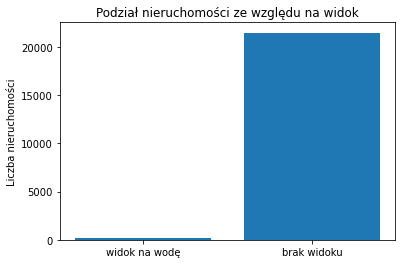

In [17]:
a=df[df.waterfront==1].id.count()
b=df[df.waterfront==0].id.count()
plt.bar(["widok na wodę", "brak widoku"],[a,b])
plt.title("Podział nieruchomości ze względu na widok")
plt.ylabel("Liczba nieruchomości")
plt.show()

b) boxplot - powierzchnia działki

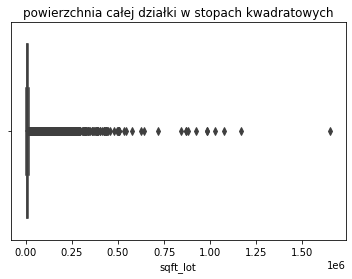

In [9]:
sns.boxplot(x=df.sqft_lot)
plt.title("powierzchnia całej działki w stopach kwadratowych")
plt.show()

c) Boxplot - cena w zależności od liczby sypialni

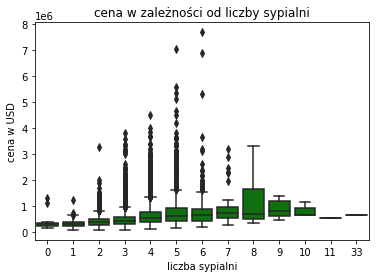

In [34]:
sns.boxplot(x=df.bedrooms,y=df.price,color="green")
plt.title("cena w zależności od liczby sypialni")
plt.xlabel("liczba sypialni")
plt.ylabel("cena w USD")
plt.show()